In [2]:
!pip3 install cvxpy
!pip3 install numpy

     |████████████████████████████████| 1.0 MB 1.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 126 kB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 164 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 14.9 MB/s eta 0:00:01
  Created wheel for cvxpy: filename=cvxpy-1.1.7-cp38-cp38-linux_x86_64.whl size=3671967 sha256=fab787ef92da66c7bbeb3d1002f7c1108d56832b2c74d71e7d133c0f501240bc
  Stored in directory: /home/himanshu/.cache/pip/wheels/51/a4/25/decef34c7e5328b040c66f7bc3ca49bd6a22dae43f0230e848
  Created wheel for ecos: filename=ecos-2.0.7.post1-cp38-cp38-linux_x86_64.whl size=215965 sha256=258f6133cb16035a547a91dbd554051b079b841d655a92d6f597255748026799
  Stored in directory: /home/himanshu/.cache/pip/wheels/c3/c1/ce/b551b0b3a40c990e1da2ec9aec

In [3]:
import cvxpy as cp
import numpy as np

In [11]:
mu = cp.Variable(12, integer=True, boolean=True) #Whether or not the action is to be performed
w = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2] #The weight assigned to each action

# Example 1 in CityResolver

- Suppose that smart traffic S1 requests 7 traffic signals on the 1st Avenue to stay green for 5 minutes (a1 to a7 with weights 1).
- If action a3 is not accepted, the service allows an alternative a8 (signal green only for 3 minutes).
- Suppose that at the same time, S2 requests 3 green signals for 3 minutes (a9 to a11, with weights 2).

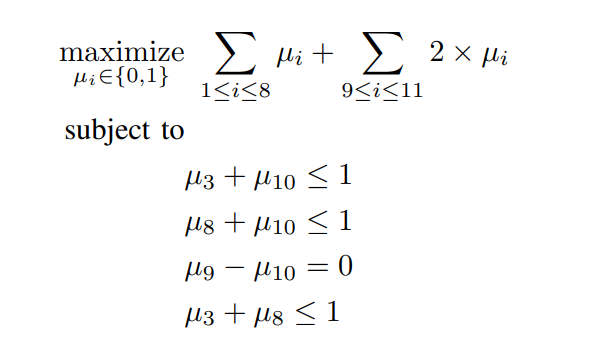

In [12]:
#Define constraints
c0 = mu[2] + mu[9] <= 1
c1 = mu[7] + mu[9] <= 1
c2 = mu[8] - mu[9] == 0
c3 = mu[2] + mu[7] <= 1

#Cost function is the sum of products of w and mu
cost = w @ mu

In [13]:
problem = cp.Problem(cp.Maximize(cost), [c0, c1, c2, c3])  #Maximize the cost with respect to the constraints
problem.solve(solver=cp.ECOS_BB)

13.999999952671153

In [15]:
print (np.round(mu.value))

[1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


Therefore, the best option is to accept all actions except a3 and a8.

## References

- Meiyi Ma, John A. Stankovic, and Lu Feng. 2018. Cityresolver: a decision support system for conflict resolution in smart cities. In Proceedings of the 9th ACM/IEEE International Conference on Cyber-Physical Systems (ICCPS '18).
- https://www.cvxpy.org/index.html